In [15]:
import numpy as np

import pandas as pd

from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import hvplot.pandas


import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [16]:
cad_jpy_df = pd.read_csv(
    
    Path("D:/git/UTOR-VIRT-FIN-PT-05-2022-U-LOLC/Resources/cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
    
)

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [17]:
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]

cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [18]:
cad_jpy_df['Return'] = (cad_jpy_df[["Price"]].pct_change() * 100)

returns = cad_jpy_df.replace(-np.inf, np.nan).dropna()

returns.head()

,Price,Open,High,Low,Return
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.846720
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901


In [19]:
cad_jpy_df['Lagged_Return'] = returns['Return'].shift()

cad_jpy_df = cad_jpy_df.dropna()

cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476,-0.846720
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901


In [20]:
tr = cad_jpy_df[:'2017']

te = cad_jpy_df['2018':]

In [21]:
X_train = tr["Lagged_Return"].to_frame()

X_test = te["Lagged_Return"].to_frame()

y_train = tr["Return"]

y_test = te["Return"]

In [22]:
X_train.head()

,Lagged_Return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

NameError: name 'Y_train' is not defined

In [24]:
predictions = lr_model.predict(X_test)\

predictions[:10]

array([ 0.00543439, -0.00731684,  0.00034045, -0.00135793, -0.01636553,
       -0.02443671,  0.00115652,  0.01734924,  0.0433532 , -0.00279188])

In [25]:
lr_df = y_test.to_frame()

lr_df["Predicted Return"] = predictions

In [26]:
lr_df.head()

,Return,Predicted Return
Date,,
2018-01-01,0.245591,0.005434
2018-01-02,-0.055679,-0.007317
2018-01-03,0.011142,0.000340
2018-01-04,0.601604,-0.001358
2018-01-05,0.919158,-0.016366


Text(0.5, 1.0, 'Return')

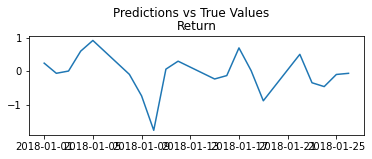

In [63]:
x = lr_df["Return"][:20]

plt.figure()

plt.suptitle("Predictions vs True Values")

plt.subplot(2,1,1)

plt.plot(x)

plt.title("Return")



Text(0.5, 1.0, 'Predicted Returns')

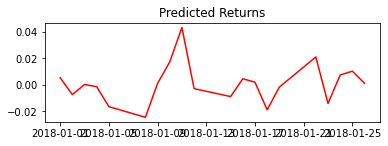

In [64]:
y = lr_df["Predicted Return"][:20]

plt.subplot(2, 1, 2)

plt.plot(y, color="red")

plt.title("Predicted Returns")

In [66]:
from sklearn.metrics import mean_squared_error

out_of_sample_mse = mean_squared_error(lr_df["Return"],lr_df["Predicted Return"])

out_of_sample_rmse = np.sqrt(out_of_sample_mse)

print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6445805658569028


In [68]:
lr_df_in_sample = y_train.to_frame()

lr_df_in_sample ["in-sample"] = lr_model.predict(X_train)


in_sample_mse = mean_squared_error(lr_df_in_sample["Return"],lr_df_in_sample["in-sample"])


in_sample_rmse = np.sqrt(in_sample_mse)

print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.841994632894117
